In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# YawDD 데이터 통계

In [ ]:
yawdd_data_path = '/content/drive/MyDrive/DMS/data/YawDD dataset/clipped'

In [10]:
import os
import cv2

def get_video_duration(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return 0
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    cap.release()
    return frame_count / fps if fps > 0 else 0

In [ ]:
camera_gender_category_dirs = os.listdir(yawdd_data_path)
labels_ = []
genders_ = []
filenames_ = []
durations_ = []

for category in camera_gender_category_dirs:
    category_path = os.path.join(yawdd_data_path, category)
    labels = os.listdir(category_path)

    for label in labels:
        label_path = os.path.join(category_path, label)

        for dirpath, _, filenames in os.walk(label_path):
            for filename in filenames:
                if filename.lower().endswith((".mp4", ".avi", ".mkv", ".mov")):
                    video_path = os.path.join(dirpath, filename)
                    duration = get_video_duration(video_path)
                    labels_.append(label)
                    filenames_.append(filename)
                    durations_.append(duration)

                    if "female" in filename.lower():
                        genders_.append("female")
                    elif "male" in filename.lower():
                        genders_.append("male")

In [ ]:
import pandas as pd

yaw_df = pd.DataFrame({
    "Label": labels_,
    "Gender": genders_,
    "Filename": filenames_,
    "Duration": durations_
})
yaw_df

,Label,Gender,Filename,Duration
0,Talking,male,3-MaleNoGlasses-Yawning-clip-1.avi,6.006006
1,Talking,male,11-MaleGlasses-Yawning-clip-0.avi,4.004004
2,Talking,male,12-MaleGlasses-Yawning-clip-0.avi,4.004004
3,Talking,male,12-MaleGlasses-Yawning-clip-2.avi,8.008008
4,Talking,male,12-MaleGlasses-Yawning-clip-4.avi,4.037371
...,...,...,...,...
414,Yawning,female,39-FemaleNoGlasses-Yawning-clip-0.avi,3.003003
415,Yawning,female,41-FemaleGlasses-Yawning-clip-0.avi,2.002002
416,Yawning,female,40-FemaleNoGlasses-Yawning-clip-1.avi,4.004004
417,Yawning,female,42-FemaleSunGlasses-Yawning-clip-1.avi,2.002002


In [ ]:
yaw_df.groupby("Label")["Duration"].sum()

,Duration
Label,
Normal,820.987654
Talking,148.882216
Yawning,803.375375


In [ ]:
yaw_df.groupby(["Label", "Gender"])["Duration"].sum().reset_index()

,Label,Gender,Duration
0,Normal,female,296.863530
1,Normal,male,524.124124
2,Talking,female,77.844511
3,Talking,male,71.037704
4,Yawning,female,403.133467
5,Yawning,male,400.241909


# DMD 데이터 통계

In [2]:
dmd_data_path = "/content/drive/MyDrive/DMS/data/DMD/dmd-clip"

In [11]:
import os

labels_ = []
filenames_ = []
durations_ = []

subject_dirs = os.listdir(dmd_data_path)
for subject in subject_dirs:
    subject_path = os.path.join(dmd_data_path, subject)

    sessions = os.listdir(subject_path)
    for session in sessions:
        session_path = os.path.join(subject_path, session, 'driver_actions')

        labels = os.listdir(session_path)
        for label in labels:
            label_path = os.path.join(session_path, label)

            for dirpath, _, filenames in os.walk(label_path):
                for filename in filenames:
                    if filename.lower().endswith((".mp4", ".avi", ".mkv", ".mov")) and "face" in filename.lower():
                        video_path = os.path.join(dirpath, filename)
                        duration = get_video_duration(video_path)

                        labels_.append(label)
                        filenames_.append(filename)
                        durations_.append(duration)

In [6]:
import pandas as pd

dmd_df = pd.DataFrame({
    "Label": labels_,
    "Filename": filenames_,
    "Duration": durations_
})

dmd_df.head()

,Label,Filename,Duration


In [ ]:
dmd_df.groupby("Label")["Duration"].sum()

,Duration
Label,


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
yaw_gr = yaw_df.groupby(["Label", "Gender"])["Duration"].sum().reset_index()
dmd_gr = dmd_df.groupby("Label")["Duration"].sum().reset_index()

In [ ]:
# YawDD vs DMD 데이터 비교 바그래프 코드

# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# YawDD 데이터셋 생성
yaw_df = pd.DataFrame({
    "Label": ["Normal", "Normal", "Talking", "Talking", "Yawning", "Yawning"],
    "Gender": ["female", "male", "female", "male", "female", "male"],
    "Duration": [296.86, 524.12, 77.84, 71.03, 403.13, 400.24]
})

# DMD 데이터셋 생성
dmd_df = pd.DataFrame({
    "Label": ["phonecall_left", "phonecall_right", "safe_drive", "texting_left", "texting_right"],
    "Duration": [5269.42, 4860.28, 14712.23, 2038.67, 2060.14]
})

# YawDD와 DMD 데이터에서 평균 지속 시간 계산
yawning_avg = yaw_df[yaw_df["Label"] == "Yawning"]["Duration"].mean()
talking_avg = yaw_df[yaw_df["Label"] == "Talking"]["Duration"].mean()
normal_avg = yaw_df[yaw_df["Label"] == "Normal"]["Duration"].mean()

phonecall_avg = dmd_df[dmd_df["Label"].str.contains("phonecall")]["Duration"].mean()
texting_avg = dmd_df[dmd_df["Label"].str.contains("texting")]["Duration"].mean()
safe_drive_avg = dmd_df[dmd_df["Label"] == "safe_drive"]["Duration"].mean()


In [ ]:
yaw_df = yaw_df.groupby('Label')['Duration'].sum().reset_index()
yaw_df

,Label,Duration
0,Normal,820.98
1,Talking,148.87
2,Yawning,803.37


In [ ]:
# yaw_df = yaw_df.drop(1, axis=0).reset_index(drop=True)
yaw_df['Label'] = ['Safe Drive', 'Yawning']
yaw_df

,Label,Duration
0,Safe Drive,820.98
1,Yawning,803.37


In [ ]:
yaw_df['Dataset'] = 'YawDD'

In [ ]:
dmd_df.rename(columns={'Label':'label'}, inplace=True)

In [ ]:
dmd_df['Label'] = ['Phone Call', 'Phone Call', 'Safe Drive', 'Texting', 'Texting']
dmd_df['Dataset'] = 'DMD'

In [ ]:
dmd_df.drop('label', axis=1, inplace=True)

In [ ]:
df = pd.concat([yaw_df, dmd_df], axis=0)
df

,Label,Duration,Dataset
0,Safe Drive,820.98,YawDD
1,Yawning,803.37,YawDD
0,Phone Call,5269.42,DMD
1,Phone Call,4860.28,DMD
2,Safe Drive,14712.23,DMD
3,Texting,2038.67,DMD
4,Texting,2060.14,DMD


In [ ]:
df = df.groupby('Label')['Duration'].sum().reset_index()

In [ ]:
df.sort_values('Duration', ascending=False)

,Label,Duration
1,Safe Drive,15533.21
0,Phone Call,10129.70
2,Texting,4098.81
3,Yawning,803.37


<ipython-input-50-acbc5c6a0ad3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Label", y="Duration", data=df.sort_values('Duration', ascending=False), palette="viridis")


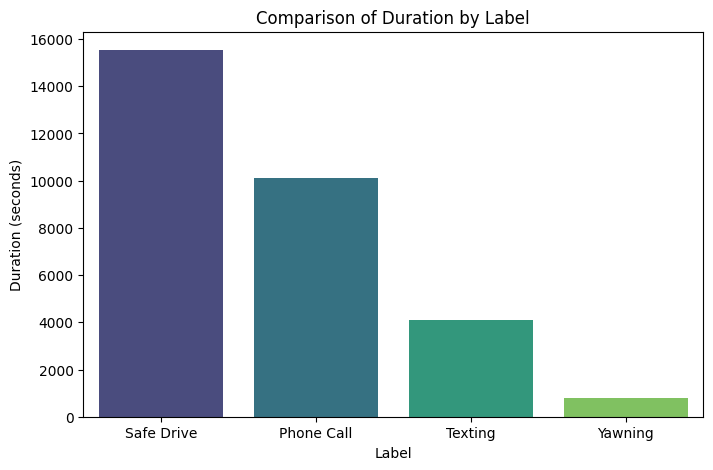

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x="Label", y="Duration", data=df.sort_values('Duration', ascending=False), palette="viridis")

plt.title("Comparison of Duration by Label")
plt.ylabel("Duration (seconds)")
# plt.xlabel("Behavior Label")
# plt.xticks(rotation=15)

plt.show()

In [ ]:
# 데이터프레임 생성
comparison_df = pd.DataFrame({
    "YawDD (avg)": [yawning_avg, talking_avg, normal_avg],
    "DMD (avg)": [phonecall_avg, texting_avg, safe_drive_avg]
}, index=["Yawning/PhoneCall", "Talking/Texting", "Normal/Safe Drive"])

# 바 그래프 생성
plt.figure(figsize=(8, 5))
comparison_df.plot(kind="bar", figsize=(8, 5), colormap="viridis")
plt.title("YawDD vs DMD: Average Duration per Label")
plt.ylabel("Average Duration (seconds)")
plt.xlabel("Behavior Label Comparison")
plt.xticks(rotation=0)
plt.legend(title="Dataset")
plt.show()